1. Class Boundaries and Posterior Probabilities

![alt text](image.png)

In [3]:
# Importing libraries required
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    return num / den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

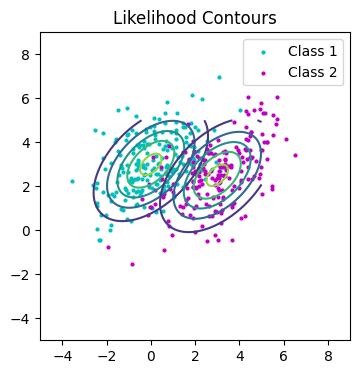

In [17]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]]) # Same covariance matrices

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1 = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A1.T + m2

nx = 200
ny = 200

Xa, Ya, Za = twoDGaussianPlot(nx, ny, m1, C)
Xb, Yb, Zb = twoDGaussianPlot(nx, ny, m2, C)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4, label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4, label='Class 2')
ax.set_xlim(-5, 9)
ax.set_ylim(-5, 9)
ax.contour(Xa, Ya, Za,5)
ax.contour(Xb, Yb, Zb,5)
ax.set_title('Likelihood Contours')
ax.legend()


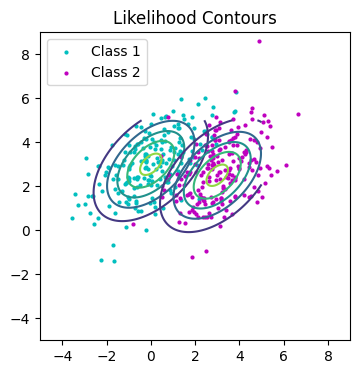

In [18]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]]) # Same covariance matrices

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1 = np.linalg.cholesky(C)
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A1.T + m1
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A1.T + m2

nx = 200
ny = 200

Xa, Ya, Za = twoDGaussianPlot(nx, ny, m1, C)
Xb, Yb, Zb = twoDGaussianPlot(nx, ny, m2, C)

fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4, label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4, label='Class 2')
ax.set_xlim(-5, 9)
ax.set_ylim(-5, 9)
ax.contour(Xa, Ya, Za,5)
ax.contour(Xb, Yb, Zb,5)
ax.set_title('Likelihood Contours')
ax.legend()

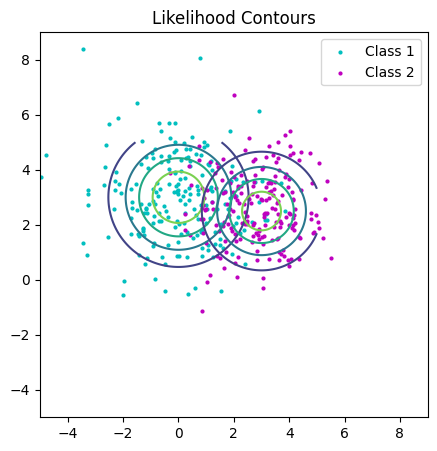

In [19]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 0], [0, 2]])
C2 = np.array([[1.5, 0], [0, 1.5]])

# Set up the data by generating isotropic Gaussians and rotating them accordingly
A1 = np.linalg.cholesky(C1)
U1 = np.random.randn(NumDataPerClass, 2)
X1 = U1 @ A1.T + m1
A2 = np.linalg.cholesky(C2)
U2 = np.random.randn(NumDataPerClass, 2)
X2 = U2 @ A2.T + m2

nx = 200
ny = 200

Xa, Ya, Za = twoDGaussianPlot(nx, ny, m1, C1)
Xb, Yb, Zb = twoDGaussianPlot(nx, ny, m2, C2)

fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X1[:, 0], X1[:, 1], c="c", s=4, label='Class 1')
ax.scatter(X2[:, 0], X2[:, 1], c="m", s=4, label='Class 2')
ax.set_xlim(-5, 9)
ax.set_ylim(-5, 9)
ax.contour(Xa, Ya, Za,5)
ax.contour(Xb, Yb, Zb,5)
ax.set_title('Likelihood Contours')
ax.legend()

In [25]:
def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2):
    x = np.linspace(-6, 6, nx)
    y = np.linspace(-6, 6, ny)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            num = P1 * gauss2D(xvec, m1, C1)
            den = P1 * gauss2D(xvec, m1, C1) + P2 * gauss2D(xvec, m2, C2)
            Z[i, j] = num / den
    return X, Y, Z


Text(0.5, 1.0, 'Posterior Probability Contours')

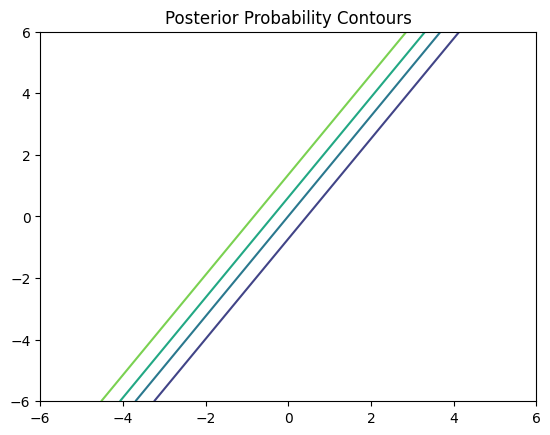

In [32]:

nx = 200
ny = 200
P1 = 0.5  # Prior probability for Class 1
P2 = 0.5  # Prior probability for Class 2

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]])

X, Y, Z = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)

plt.contour(X, Y, Z,5)
plt.title('Posterior Probability Contours')

Text(0.5, 1.0, 'Posterior Probability Contours')

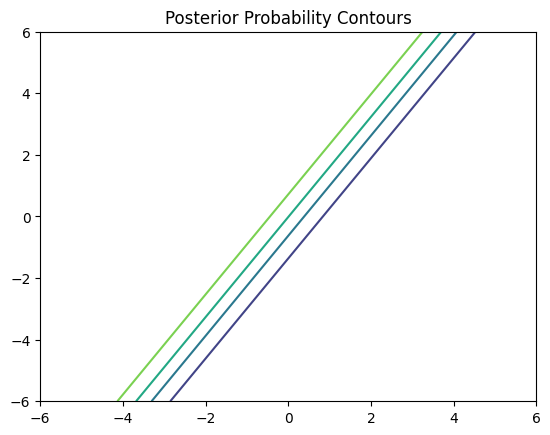

In [29]:
nx = 200
ny = 200
P1 = 0.7  # Prior probability for Class 1
P2 = 0.3  # Prior probability for Class 2

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]])

X, Y, Z = posteriorPlot(nx, ny, m1, C, m2, C, P1, P2)

plt.contour(X, Y, Z,5)
plt.title('Posterior Probability Contours')

Text(0.5, 1.0, 'Posterior Probability Contours')

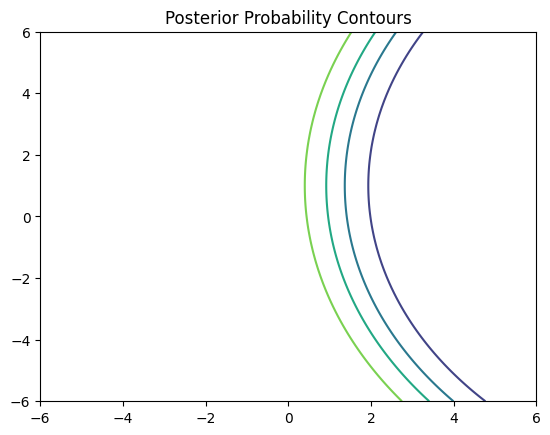

In [31]:
nx = 200
ny = 200
P1 = 0.5  # Prior probability for Class 1
P2 = 0.5  # Prior probability for Class 2

m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 0], [0, 2]])
C2 = np.array([[1.5, 0], [0, 1.5]])

X, Y, Z = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)

plt.contour(X, Y, Z,5)
plt.title('Posterior Probability Contours')

2. Fisher LDA and ROC curve

(-6.0, 10.0)

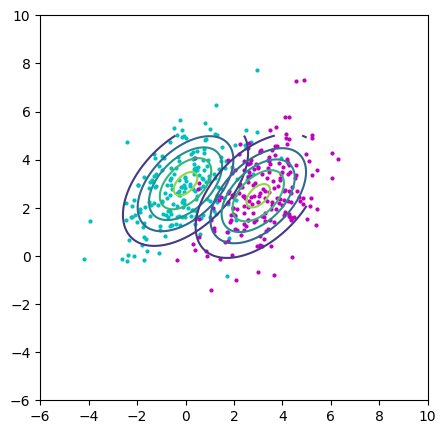

In [54]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])

nx, ny = 200, 200

Xa, Ya, Za = twoDGaussianPlot (nx, ny, m1, C1)
Xb, Yb, Zb = twoDGaussianPlot (nx, ny, m2, C2)

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

uf: [ 1.08333333 -0.66666667]


(array([ 1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,  2.,  5.,  5.,
         7.,  8., 13., 11.,  7., 14.,  8., 10.,  7., 11., 11.,  7.,  8.,
         8.,  6., 11.,  6.,  4.,  4.,  7.,  5.,  1.,  2.,  2.,  2.,  1.,
         1.]),
 array([-2.29585174, -2.11398074, -1.93210975, -1.75023875, -1.56836776,
        -1.38649676, -1.20462576, -1.02275477, -0.84088377, -0.65901277,
        -0.47714178, -0.29527078, -0.11339978,  0.06847121,  0.25034221,
         0.43221321,  0.6140842 ,  0.7959552 ,  0.9778262 ,  1.15969719,
         1.34156819,  1.52343919,  1.70531018,  1.88718118,  2.06905218,
         2.25092317,  2.43279417,  2.61466517,  2.79653616,  2.97840716,
         3.16027816,  3.34214915,  3.52402015,  3.70589115,  3.88776214,
         4.06963314,  4.25150414,  4.43337513,  4.61524613,  4.79711713,
         4.97898812]),
 <BarContainer object of 40 artists>)

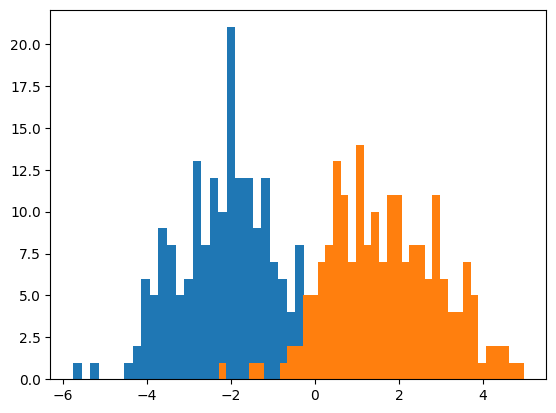

In [56]:
C = np.array([[2, 1], [1, 2]])
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])

Ci = np.linalg.inv(2*C)
uF = Ci @ (m2-m1)
print('uf:',uF)

yp1 = X1 @ uF
yp2 = X2 @ uF
plt.hist(yp1, bins=40)
plt.hist(yp2, bins=40)

(-6.0, 10.0)

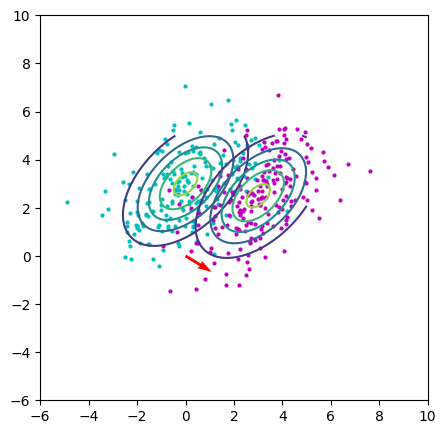

In [60]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])

nx, ny = 200, 200

Xa, Ya, Za = twoDGaussianPlot (nx, ny, m1, C1)
Xb, Yb, Zb = twoDGaussianPlot (nx, ny, m2, C2)

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A1 = np.linalg.cholesky(C1)
A2 = np.linalg.cholesky(C2)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A1.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A2.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 0, uF[0], uF[1], angles='xy', scale_units='xy', scale=1, color='r')
# ax.plot([0, uF[0]],[0, uF[1]])
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

-5.766193904571154 4.9789881218498095

  Threshold    Accuracy
 -1.59969         81
 -1.38041         84
 -1.16112         85.75
 -0.941826        89
 -0.722537        90.5
 -0.503248        90.75
 -0.283958        92.25
 -0.0646687       91.75
  0.154621        91
  0.37391         90
  0.5932          87
  0.812489        84
  1.03178         81.25


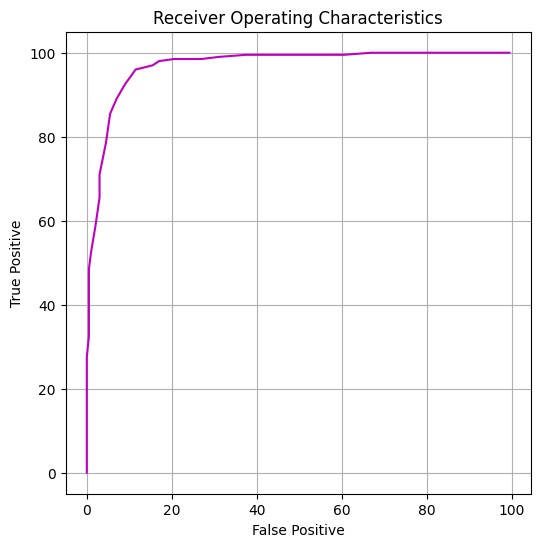

In [64]:
# Define a range over which to slide a threshold
#
pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
print(pmin, pmax)
print()
# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 3) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  TN = len(yp1[yp1 <= thresh]) * 100 / len(yp1)  # True Negatives
  accuracy = (TP + TN) / 2  # Accuracy
  ROC[i, :] = [TP, FP, accuracy]

# Printing accuracy for each threshold

from tabulate import tabulate

table_data = []
for i in range(50):  
    if ROC[i][2] > 80:
        table_data.append([thRange[i], ROC[i][2]])

print(tabulate(table_data, headers=["Threshold", "Accuracy"], tablefmt="plain"))

# Plot ROC curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)

A random direction (instead of the Fisher discriminant direction).

In [83]:
print("Fisher discriminant direction:", uF)
area = np.trapz(np.flip(ROC[:,0]), np.flip(ROC[:,1]))
print("Area under the ROC curve:", area)
print("Area under the ROC curve as a percentage:", area/10000,"%")

Fisher discriminant direction: [0.586396745738629, 0.6017094731063659]
Area under the ROC curve: 9643.25
Area under the ROC curve as a percentage: 0.964325 %


Random direction :  [0.6403514554925633, 0.4203794825967755]
AUC for random direction: 8094.5
Area under the ROC curve as a percentage: 0.80945 %


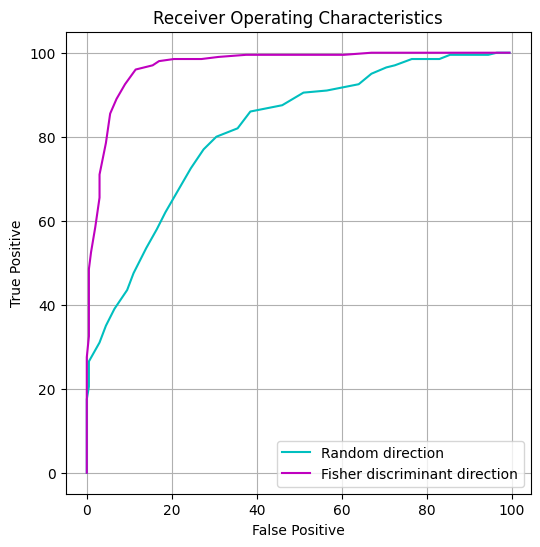

In [89]:
# Define a range over which to slide a threshold
#
uF = [(np.random.random()*2)-1, (np.random.random()*2)-1]
print("Random direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC_New = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC_New[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_New[:,1], ROC_New[:,0], c='c')
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Random direction", "Fisher discriminant direction"])

area = np.trapz(np.flip(ROC_New[:,0]), np.flip(ROC_New[:,1]))
print("AUC for random direction:", area)
print("Area under the ROC curve as a percentage:", area/10000,"%")

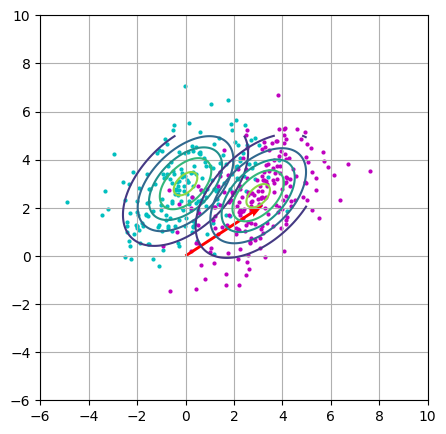

In [90]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 0, uF[0], uF[1], angles='xy', scale_units='xy', scale=0.2, color='r')
# ax.plot([0, uF[0]],[0, uF[1]])
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)
ax.grid(True)

Projections onto the direction connecting the means of the two classes.

Mean connecting direction :  [3.0, -0.5]
AUC for random direction: 9310.75
Area under the ROC curve as a percentage: 0.931075 %


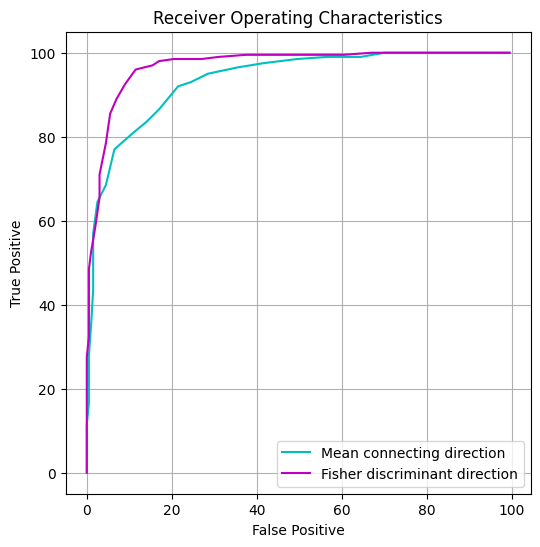

In [91]:
# Define a range over which to slide a threshold
#
uF = [m2[0]-m1[0], m2[1]-m1[1]]
print("Mean connecting direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC_New = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC_New[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_New[:,1], ROC_New[:,0], c='c')
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Mean connecting direction", "Fisher discriminant direction"])

area = np.trapz(np.flip(ROC_New[:,0]), np.flip(ROC_New[:,1]))
print("AUC for random direction:", area)
print("Area under the ROC curve as a percentage:", area/10000,"%")

(-4.0, 8.0)

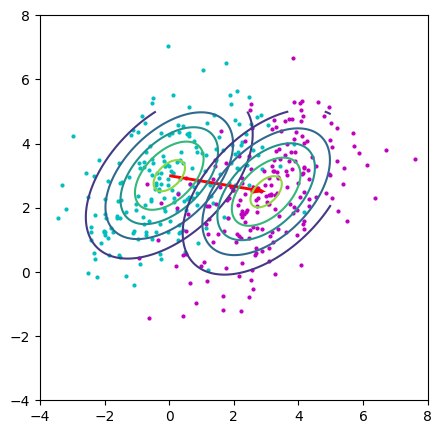

In [93]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 3, uF[0], uF[1], angles='xy', scale_units='xy', scale=1, color='r')
# ax.plot([0, uF[0]],[0, uF[1]])
ax.contour(Xa, Ya, Za, 5)
ax.contour(Xb, Yb, Zb, 5)
ax.set_xlim(-4, 8)
ax.set_ylim(-4, 8)

3 Mahalanobis Distance

(-6.0, 10.0)

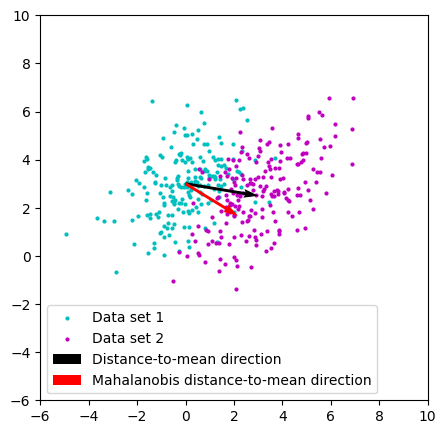

In [95]:
NumDataPerClass = 200
# Two-class problem, distinct means, equal covariance matrices
#
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])
C = np.array([[2, 1], [1, 2]])

# Set up the data by generating isotropic Guassians and
# rotating them accordingly
#
A = np.linalg.cholesky(C)

U1 = np.random.randn(NumDataPerClass,2)
X1 = U1 @ A.T + m1

U2 = np.random.randn(NumDataPerClass,2)
X2 = U2 @ A.T + m2

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X1[:,0], X1[:,1], c="c", s=4)
ax.scatter(X2[:,0], X2[:,1], c="m", s=4)
ax.quiver(0, 3, 3.0, -0.5, angles='xy', scale_units='xy', scale=1, color='k') # Distance to Mean direction
ax.quiver(0, 3, 2.16666667, -1.33333333, angles='xy', scale_units='xy', scale=1, color='r') # Mahanolobis distance to Mean direction
ax.legend(["Data set 1", "Data set 2", "Distance-to-mean direction", "Mahalanobis distance-to-mean direction"])
ax.set_xlim(-6, 10)
ax.set_ylim(-6, 10)

distance-to-mean classifier

Mean connecting direction :  [3.0, -0.5]
AUC for Mean connecting direction: 9541.75
AUC for Mean connecting direction as a percentage: 0.954175 %


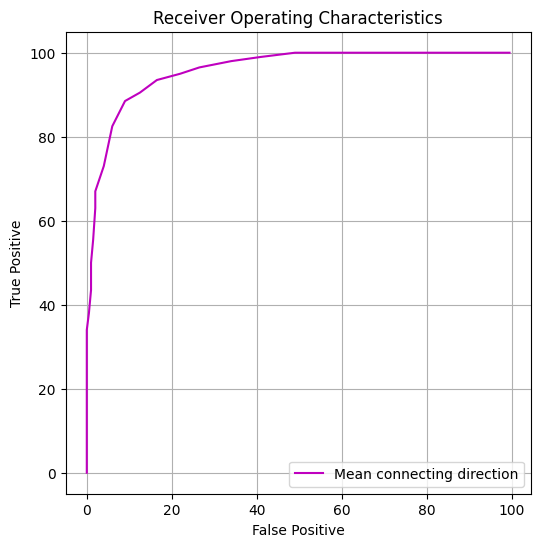

In [97]:
# Define a range over which to slide a threshold
#
uF = [m2[0]-m1[0], m2[1]-m1[1]]
print("Mean connecting direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC[:,1], ROC[:,0], c='m')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Mean connecting direction", "Fisher discriminant direction"])

area = np.trapz(np.flip(ROC[:,0]), np.flip(ROC[:,1]))
print("AUC for Mean connecting direction:", area)
print("AUC for Mean connecting direction as a percentage:", area/10000, "%")

In [51]:
def mahalanobis_distance_direction(mean1, mean2, covariance):
    direction = mean2 - mean1

    inv_covariance = np.linalg.inv(covariance)
    mahalanobis_direction = np.dot(inv_covariance, direction)

    return mahalanobis_direction

Mahalanobis Mean connecting direction :  [ 2.16666667 -1.33333333]
AUC for Mahalanobis distance-to-mean direction: 9670.125
AUC for Mahalanobis distance-to-mean direction as a percentage: 0.9670125 %


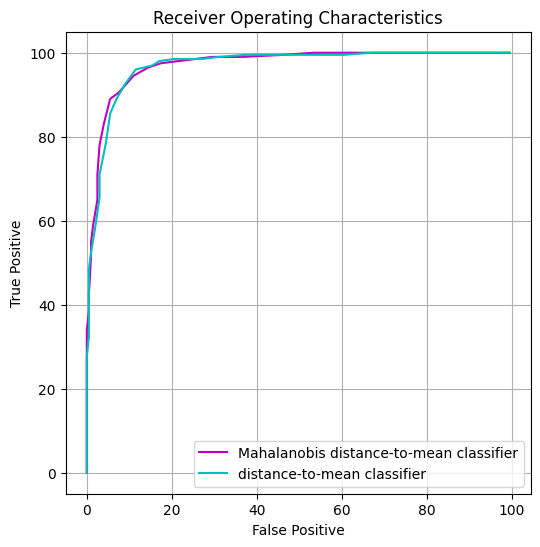

In [96]:
# Define a range over which to slide a threshold
#
uF = mahalanobis_distance_direction(m1, m2, C)
print("Mahalanobis Mean connecting direction : ", uF)

yp1 = X1 @ uF
yp2 = X2 @ uF

pmin = np.min( np.array( (np.min(yp1), np.min(yp2) )))
pmax = np.max( np.array( (np.max(yp1), np.max(yp2) )))
# print(pmin, pmax)

# Set up an array of thresholds
#
nRocPoints = 50;
thRange = np.linspace(pmin, pmax, nRocPoints)
ROC_New = np.zeros( (nRocPoints, 2) )
# Compute True Positives and False positives at each threshold

for i in range(len(thRange)):
  thresh = thRange[i]
  TP = len(yp2[yp2 > thresh]) * 100 / len(yp2)
  FP = len(yp1[yp1 > thresh]) * 100 / len(yp1)
  ROC_New[i, :] = [TP, FP]

# Plot ROC_New curve
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(ROC_New[:,1], ROC_New[:,0], c='m')
ax.plot(ROC[:,1], ROC[:,0], c='c')
ax.set_xlabel('False Positive')
ax.set_ylabel('True Positive')
ax.set_title('Receiver Operating Characteristics')
ax.grid(True)
ax.legend(["Mahalanobis distance-to-mean classifier", "distance-to-mean classifier"])

area = np.trapz(np.flip(ROC_New[:,0]), np.flip(ROC_New[:,1]))
print("AUC for Mahalanobis distance-to-mean direction:", area)
print("AUC for Mahalanobis distance-to-mean direction as a percentage:", area/10000, "%")